# Vehicle CO2 Emission Data Analysis
### Data Source: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles
### <span style="color:green">Goal:</span> 
- What features affect Vehicle CO2 Emissions the most?


## Load and Inspect Raw Data

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datacleaner
from datacleaner import autoclean
from fasteda import fast_eda
warnings.filterwarnings('ignore')


path = r"C:\Users\nolot\OneDrive\Desktop\Data Project 1 - CO2_Vehicles\VehicleCO2\CO2 Emissions.csv"

df = pd.read_csv(path)

df.head(20)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [18]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [35]:
# Check Null Values
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

# Cross Correlation Matrix

In [36]:
# Calculate the correlation matrix for numeric columns
df.corr(numeric_only=True)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [22]:
# Since Fuel Consumption Comb (L/100km) and (mpg) are the same field but with different units we will focus on the higher correlation Fuel Consumption Comb(L/100km)
#We will not focus on Fuel Consumption City because Fuel Consumption Comb is a combination of City and Hwy to give a general sense of Fuel Consumption on CO2 Emissions

In [ ]:
# Make copy of original dataframe to work on

# Data Preprocessing
#### Now Working with df2 

In [29]:
df2 = df.copy()
df2.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Converting String Values(e.g Make,Model,Transmission..) from given information in dataset

## Fuel type
X = Regular gasoline
Z = Premium gasoline
D = Diesel
E = Ethanol (E85)
N = Natural gas

In [27]:
fuel_mapping = {'x': 'Regular gasoline', 'Z': 'Premium gasoline', 'D':'Diesel', 'E':'Ethanol(E85)','N':'Natural gas'}
df2['Fuel Type']=df2['Fuel Type'].replace(fuel_mapping)

In [28]:
# df_clean = autoclean(df)
# df_clean.head(25)
#Dont want to autoclean yet but individually replace features with correct values
df2.head(35)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Premium gasoline,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Premium gasoline,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Premium gasoline,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Premium gasoline,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Premium gasoline,10.6,7.5,9.2,31,212


# Start Experimentation and Predictions

---

# Method 1: Non-One-Hot_Encoding using only numeric fields for label predictions
# Method 2: One-Hot-Encoding on Categorical fields for label predictions

### Create Features

In [16]:

features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
X = df[features]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, df['CO2 Emissions(g/km)'], test_size=0.2, random_state=42)


In [18]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error: 421.9223319051996
R-squared (R2): 0.8773348735033226


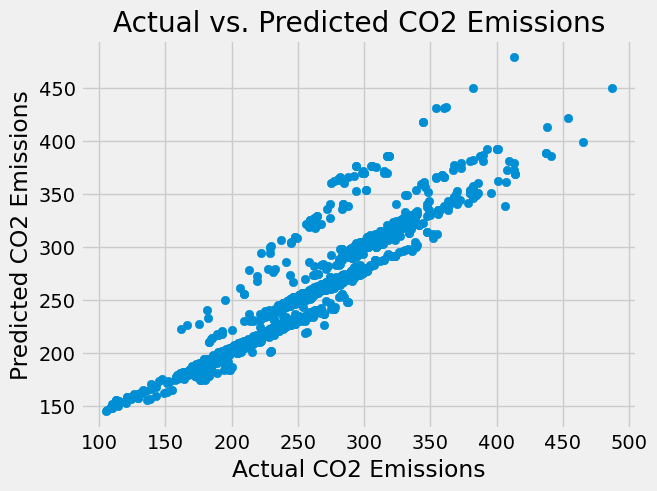

In [20]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs. Predicted CO2 Emissions")
plt.show()


In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np


# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean and standard deviation of the scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # Convert negative MSE scores to positive

print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation MSE: {np.std(mse_scores)}')


Mean MSE: 412.13055523702496
Standard Deviation MSE: 22.61594920008412


In [14]:
# After fitting the model:
intercept = model.intercept_
coefficients = model.coef_

# Display the equation
equation = f"CO2 Emissions = {intercept:.2f} + "
for i, coef in enumerate(coefficients):
    equation += f"{coef:.2f} * {features[i]} + "

# Remove the trailing '+' sign
equation = equation[:-2]

print("Linear Regression Equation:")
print(equation)


Linear Regression Equation:
CO2 Emissions = 51.53 + 5.59 * Engine Size(L) + 6.38 * Cylinders + 13.27 * Fuel Consumption Comb (L/100 km) 
